<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/08%20gold_vs_stocks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [1]:
import matplotlib. pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

## Расчеты для статьи "Золото и серебро на фоне биржевых кризисов"

Статья доступна на [сайте RostSber.ru](https://rostsber.ru/publish/stocks/gold_and_stocks.html).

### История цен на золото

In [2]:
gd_price = ok.Asset('GC.COMM')

Text(0.5, 1.0, 'Цена унции золота 1979-2022')

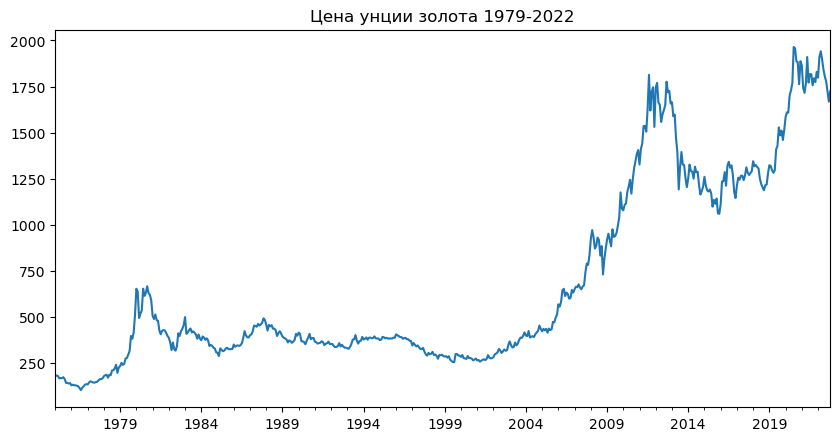

In [4]:
gd_price.close_monthly.plot(figsize=[10, 5], legend=False)
plt.xlabel('')
plt.title('Цена унции золота 1979-2022')

Для иллюстрации строим график роста цены золота в рублях ...

In [5]:
gd = ok.AssetList(['GC.COMM'], ccy='RUB', inflation=False)
gd

assets                    [GC.COMM]
currency                        RUB
first_date                  1992-08
last_date                   2022-10
period_length    30 years, 3 months
inflation                      None
dtype: object

Text(0.5, 1.0, 'Рост цены золота в рублях 1992-2022')

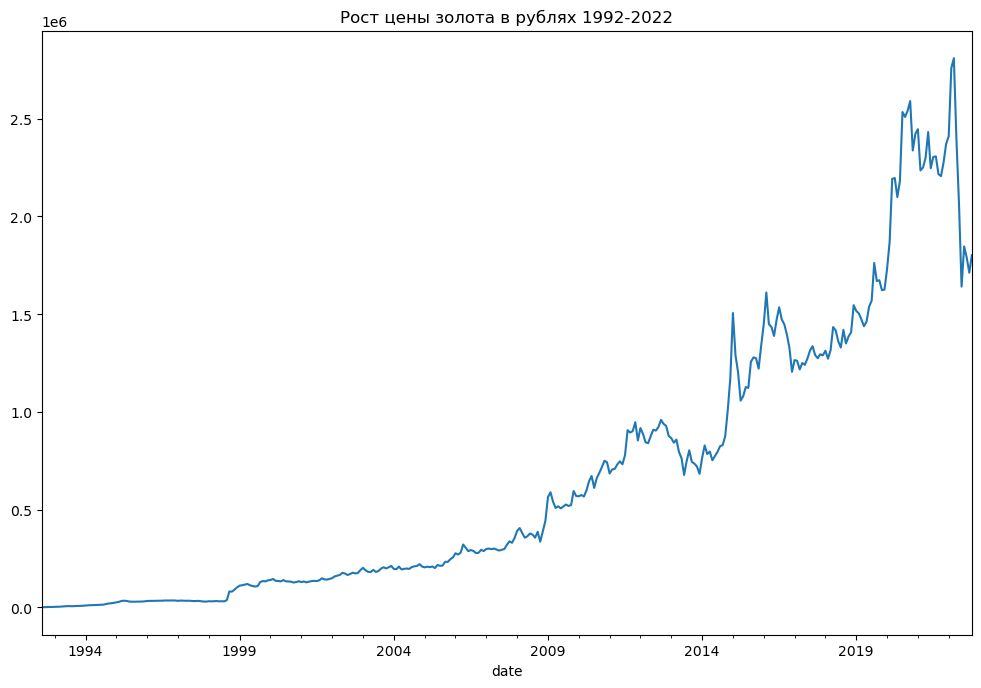

In [6]:
gd.wealth_indexes.plot(legend=False)
plt.title('Рост цены золота в рублях 1992-2022')

### Среднегодовая доходность акций США и золота

In [7]:
ls = ['GC.COMM', 'DJI.INDX']  # индекс Доу c 1979 года
x = ok.AssetList(ls, inflation=False)
x

assets           [GC.COMM, DJI.INDX]
currency                         USD
first_date                   1975-02
last_date                    2022-10
period_length     47 years, 9 months
inflation                       None
dtype: object

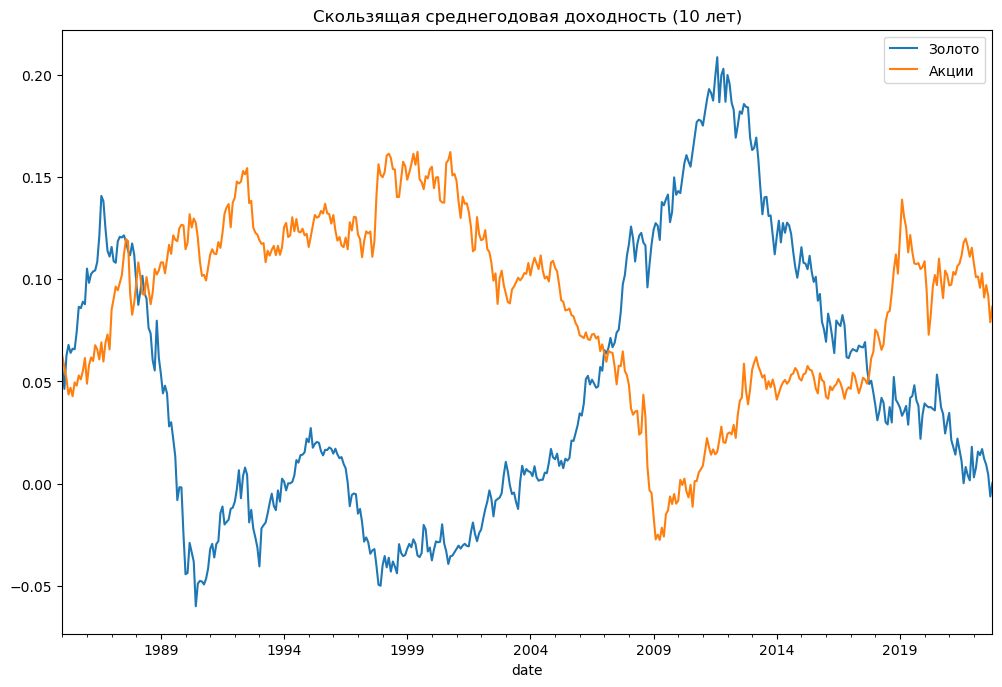

In [8]:
x.get_rolling_cagr(window=12 * 10).plot()
plt.legend(['Золото', 'Акции'])
plt.title('Скользящая среднегодовая доходность (10 лет)');

### Корреляция между золотом и акциями США

In [9]:
dji = ok.AssetList(['GC.COMM', 'DJI.INDX'], inflation=False)

Text(0.5, 1.0, 'Dow Jones Industrial Average (DJI)')

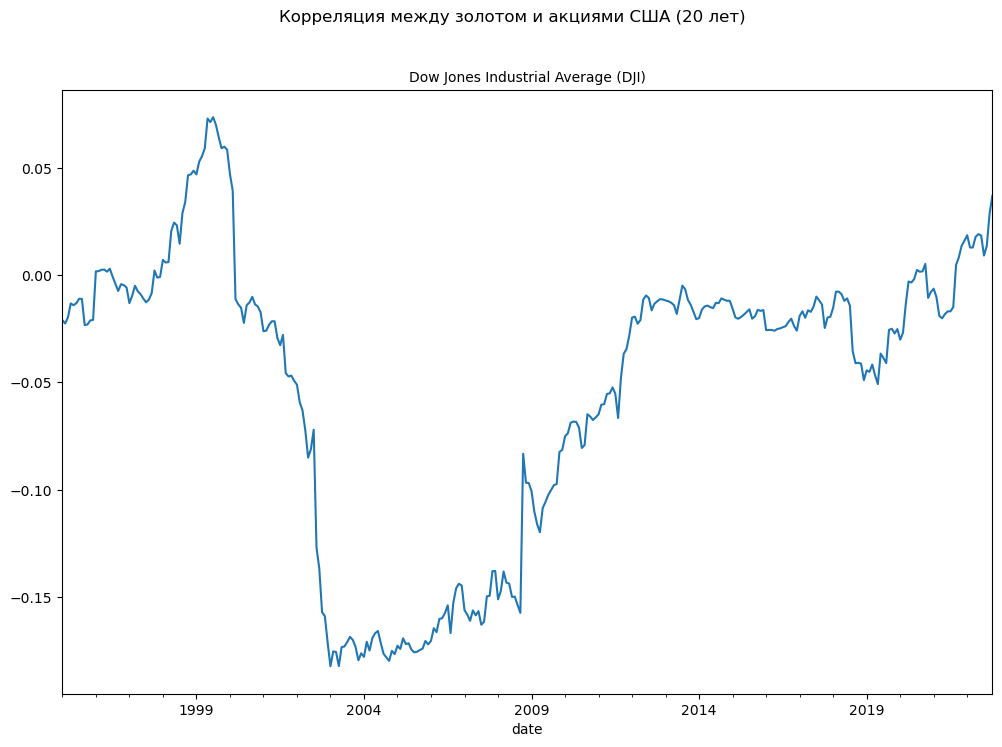

In [10]:
dji.index_rolling_corr(window=12*20).plot(legend=False)
plt.suptitle('Корреляция между золотом и акциями США (20 лет)')
plt.title('Dow Jones Industrial Average (DJI)', fontsize=10)

In [12]:
indexes = ok.symbols_in_namespace('INDX')
indexes

,symbol,ticker,name,country,exchange,currency,type
0,000906.INDX,000906,CHINA SECURITIES INDEX 800,Unknown,INDX,USD,INDEX
1,0O7N.INDX,0O7N,SCALE ALL SHARE GR EUR,Germany,INDX,EUR,INDEX
2,3LHE.INDX,3LHE,ESTX 50 CORPORATE BOND TR,Greece,INDX,EUR,INDEX
3,5SP2550.INDX,5SP2550,S&P 500 RETAILING INDEX,USA,INDX,USD,INDEX
4,990100.INDX,990100,MSCI International World Index Price,Unknown,INDX,USD,INDEX
...,...,...,...,...,...,...,...
662,XNG.INDX,XNG,ARCA Natural Gas,USA,INDX,USD,INDEX
663,XOI.INDX,XOI,ARCA Oil,USA,INDX,USD,INDEX
664,XU030.INDX,XU030,BIST 30,Turkey,INDX,TRY,INDEX
665,XU100.INDX,XU100,BIST 100,Turkey,INDX,TRY,INDEX


In [17]:
indexes[indexes.name.str.contains('NASDAQ')]

,symbol,ticker,name,country,exchange,currency,type
171,DVG.INDX,DVG,NASDAQ US Dividend Achievers Select,USA,INDX,USD,INDEX
172,DVGTR.INDX,DVGTR,NASDAQ DIV ACHIEVRS SEL IDX TR,Unknown,INDX,USD,INDEX
263,IXHC.INDX,IXHC,NASDAQ Health Care,USA,INDX,USD,INDEX
264,IXIC.INDX,IXIC,NASDAQ Composite,USA,INDX,USD,INDEX
327,NBI.INDX,NBI,NASDAQ Biotechnology,USA,INDX,USD,INDEX
410,NQ.INDX,NQ,NASDAQ 100,Unknown,INDX,USD,INDEX
634,VXN.INDX,VXN,CBOE NASDAQ 100 Volatility,USA,INDX,USD,INDEX
658,XCMP.INDX,XCMP,NASDAQ Composite Total Return,USA,INDX,USD,INDEX


In [13]:
sp = ok.AssetList(['GC.COMM', 'GSPC.INDX'], inflation=False)
sp

assets           [GC.COMM, GSPC.INDX]
currency                          USD
first_date                    1975-02
last_date                     2022-10
period_length      47 years, 9 months
inflation                        None
dtype: object

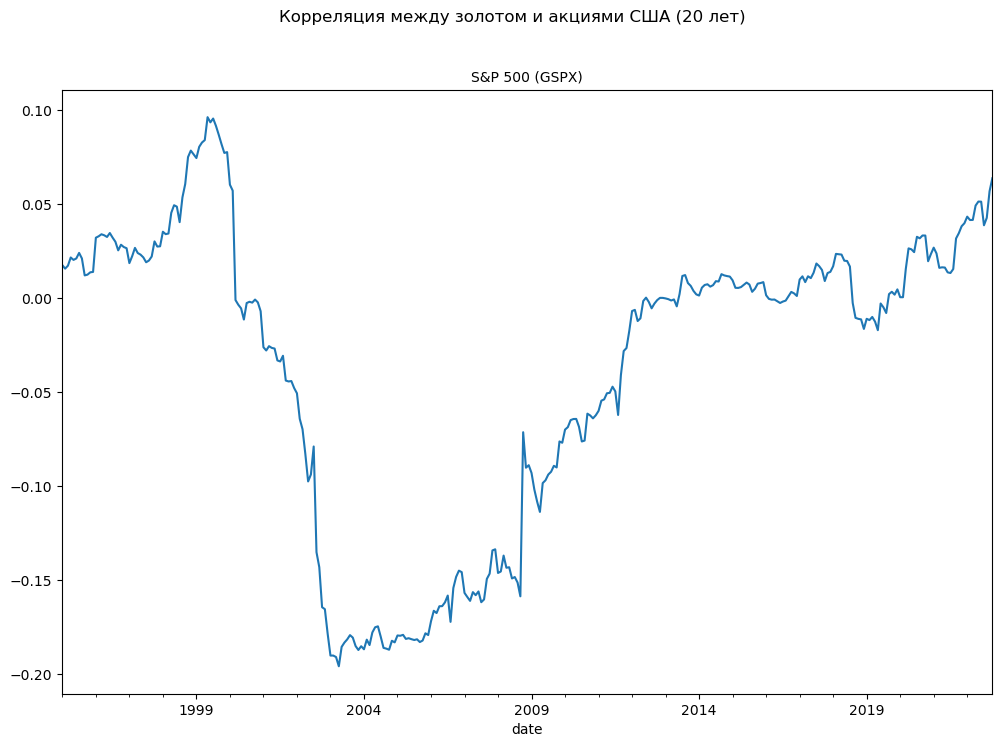

In [14]:
sp.index_rolling_corr(window=12*20).plot(legend=False)
plt.suptitle('Корреляция между золотом и акциями США (20 лет)')
plt.title('S&P 500 (GSPX)', fontsize=10);

In [16]:
ns = ok.AssetList(['GC.COMM', 'IXIC.INDX'], inflation=False)
ns

assets           [GC.COMM, IXIC.INDX]
currency                          USD
first_date                    1975-02
last_date                     2022-10
period_length      47 years, 9 months
inflation                        None
dtype: object

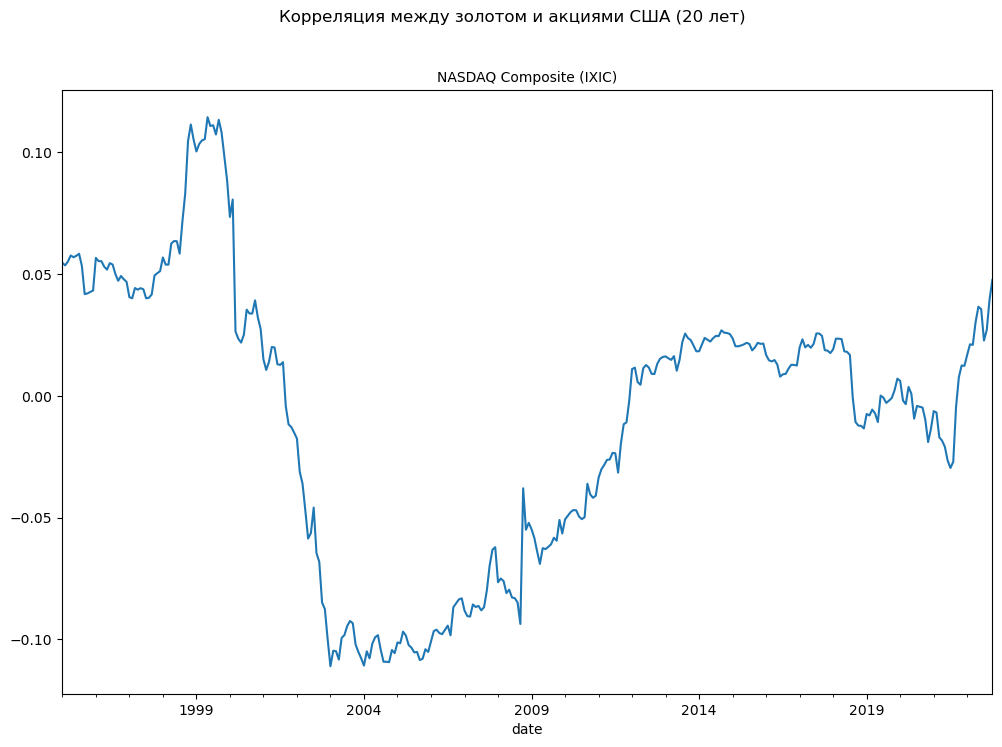

In [17]:
ns.index_rolling_corr(window=12*20).plot(legend=False)
plt.suptitle('Корреляция между золотом и акциями США (20 лет)')
plt.title('NASDAQ Composite (IXIC)', fontsize=10);

### Корреляция между золотом и российскими акциями

In [18]:
y = ok.AssetList(['IMOEX.INDX', 'GC.COMM'], ccy='RUB', inflation=False)

In [19]:
y

assets           [IMOEX.INDX, GC.COMM]
currency                           RUB
first_date                     1997-10
last_date                      2022-10
period_length       25 years, 1 months
inflation                         None
dtype: object

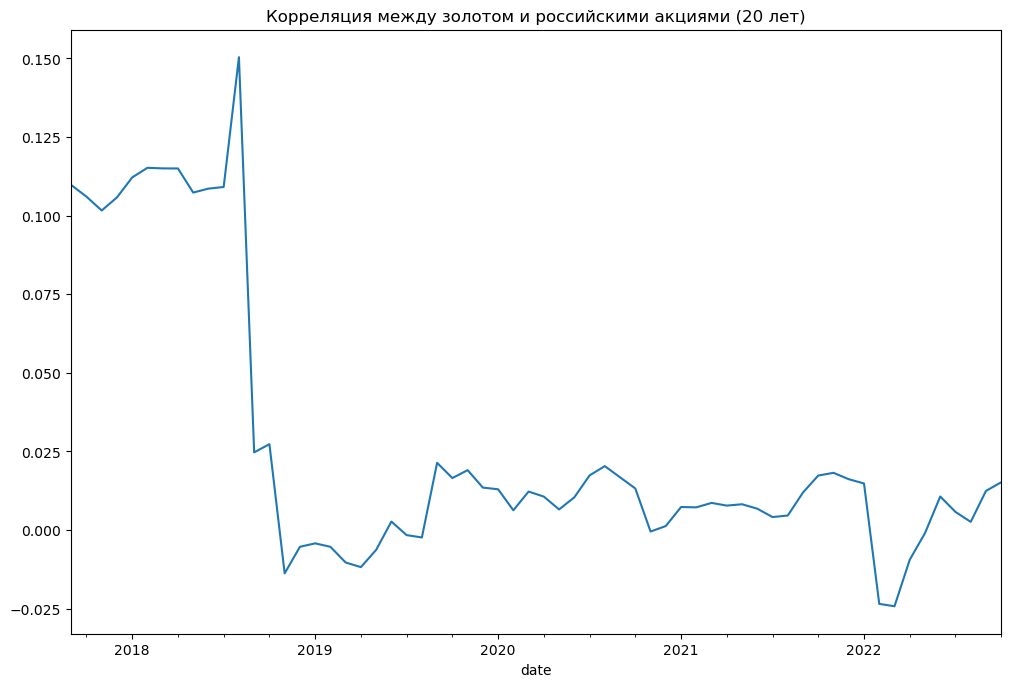

In [20]:
y.index_rolling_corr(window=12*20).plot(legend=False)
plt.title('Корреляция между золотом и российскими акциями (20 лет)');